In [1]:
from MTM import MTSystem
from mkutils import create_fig
import numpy as np

In [2]:
systems = []
m = 12
concs = [0.15, 0.05, 0.005] 
for conc in concs:
    systems.append(MTSystem(m=m, surfactant_concentration=conc))



/home/mk8118/CODE/MT_micellization/MTM/micelles/bilayer_vesicle.py:80: UserWarning: Error in Optimisation of micelle dimension: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn(errmsg)
/home/mk8118/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(errmsg)
/home/mk8118/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(errmsg)
/home/mk8118/CODE/MT_micellization/MTM/mt_system.py:241: RuntimeWarning: overflow encountered in exp
  this_value = np.exp(g * (1.0 + np.log(monomer_conc) - mu_min) - 1.0)
/home/mk8118/CODE/MT_micellization/MTM/mt_system.py:208: RuntimeWarning: overflow encountered in double_scalars
 

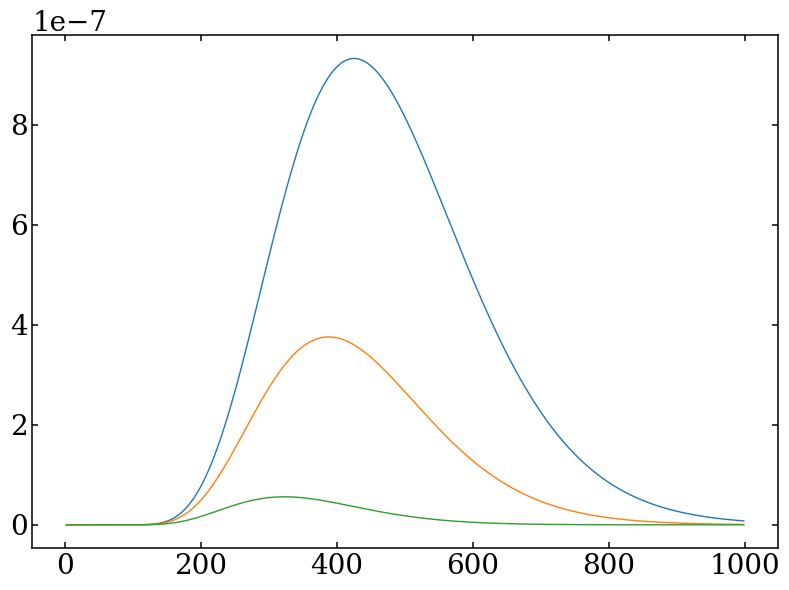

In [3]:
fig, ax = create_fig(1, 1)
ax = ax[0]
n=1000
sizes = np.linspace(1,n,n)
for system in systems:
    distrib = system.get_aggregate_distribution()
    print(distrib[0:2], sizes[:2])
    ax.plot(sizes[1:-1], distrib[1:])

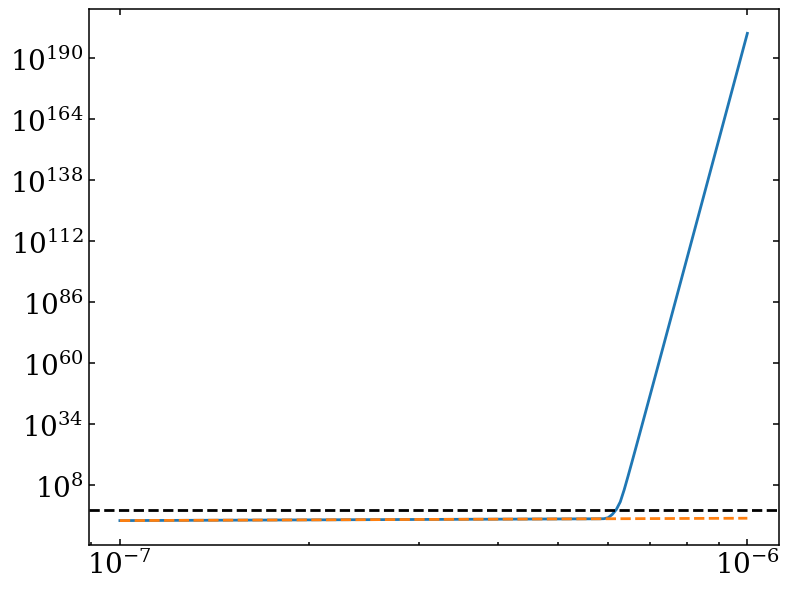

In [4]:
fig, ax = create_fig(1, 1)
ax = ax[0]

ax.set_yscale('log')
ax.set_xscale('log')

x = np.linspace(1e-7, 1e-6, 100)

ax.plot(x, [systems[2].mass_balance(xi) for xi in x], lw=2, label='Mass Balance')
ax.plot(x,x, lw=2, ls='--', label='Monomer Conc')
ax.axhline(systems[2].surfactant_concentration, label='Surfactant Conc', lw=2, ls='--', color='k')

1e-07
1.668100537200059e-07
2.782559402207126e-07
4.641588833612782e-07
7.742636826811278e-07
1.2915496650148827e-06
2.1544346900318822e-06
3.5938136638046257e-06
5.994842503189409e-06
1e-05
1.0000000185551832
1.000000030967135
1.0000000516988363
1.0000000863582181
1.2992964891308596
2.1444685687470093
3.5411536515644477
5.8310941607669635
9.545099076567809
15.48717168748208


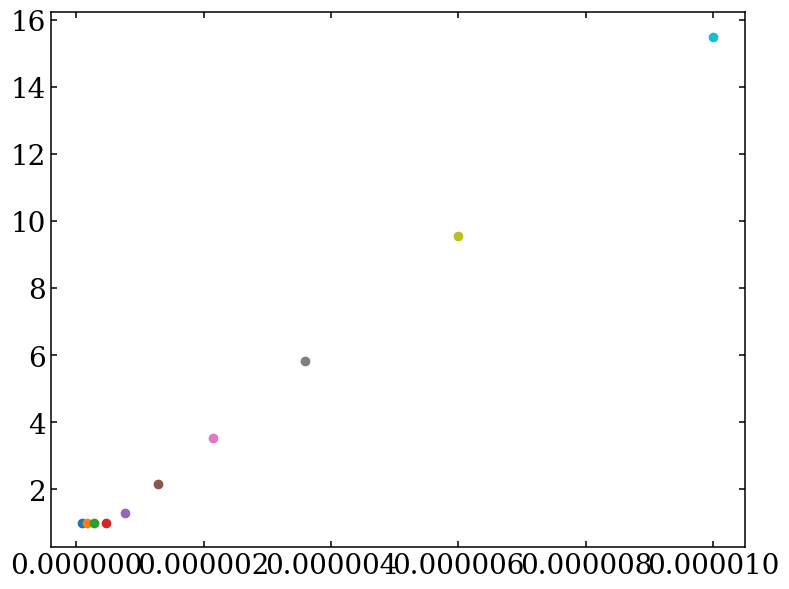

In [5]:
fig, ax = create_fig(1,1)
ax = ax[0]
concs = np.logspace(-7, -5, 10) 
systems=[]
for conc in concs:
    print(conc)
    systems.append(MTSystem(m=m, surfactant_concentration=conc))
    _ = systems[-1].get_aggregate_distribution()

for system in systems:
    gn = sum([(i+1)*item for i, item in enumerate(system.aggregate_distribution)])
    gn /= sum(system.aggregate_distribution)
    print(gn)
    ax.plot(system.surfactant_concentration, gn, marker='o')